# Mia's solution for 4.2 exercise

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

## Examples of chapter 4 

In [3]:
live, firsts, others = first.MakeFrames()

And compute the distribution of birth weight for first babies and others.

In [4]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

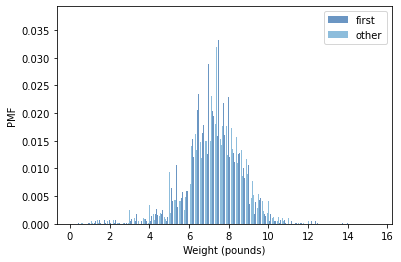

In [5]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

`PercentileRank` computes the fraction of `scores` less than or equal to `your_score`.

In [6]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

If this is the list of scores.

In [6]:
t = [55, 66, 77, 88, 99]

And you got the 88, your percentile rank is 80.

In [7]:
PercentileRank(t, 88)

80.0

`Percentile` takes a percentile rank and computes the corresponding percentile. 

In [7]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

The median is the 50th percentile, which is 77.

In [9]:
Percentile(t, 50)

77

Here's a more efficient way to compute percentiles.

In [8]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

Let's hope we get the same answer.

In [11]:
Percentile2(t, 50)

77

The Cumulative Distribution Function (CDF) is almost the same as `PercentileRank`.  The only difference is that the result is 0-1 instead of 0-100.

In [9]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In this list

In [13]:
t = [1, 2, 2, 3, 5]

We can evaluate the CDF for various values:

In [14]:
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)

(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

Here's an example using real data, the distribution of pregnancy length for live births.

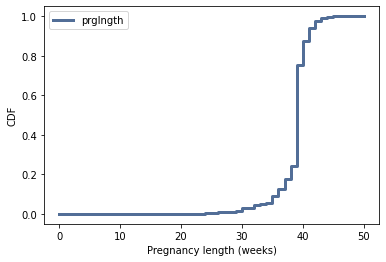

In [10]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

`Cdf` provides `Prob`, which evaluates the CDF; that is, it computes the fraction of values less than or equal to the given value.  For example, 94% of pregnancy lengths are less than or equal to 41.

In [11]:
cdf.Prob(41)

0.9406427634455619

`Value` evaluates the inverse CDF; given a fraction, it computes the corresponding value.  For example, the median is the value that corresponds to 0.5.

In [12]:
cdf.Value(0.5)

39

In general, CDFs are a good way to visualize distributions.  They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

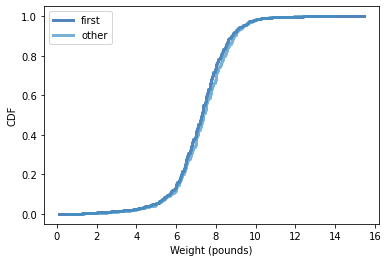

In [13]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In this example, we can see that first babies are slightly, but consistently, lighter than others.

We can use the CDF of birth weight to compute percentile-based statistics.

In [14]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

Again, the median is the 50th percentile.

In [15]:
median = live_cdf.Percentile(50)
median

7.375

The interquartile range is the interval from the 25th to 75th percentile.

In [16]:
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

We can use the CDF to look up the percentile rank of a particular value.  For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile.

In [17]:
live_cdf.PercentileRank(10.2)

98.82717415357381

If we draw a random sample from the observed weights and map each weigh to its percentile rank.

In [18]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]
print(ranks)

[70.39167957512724, 16.629785350741315, 40.185881832263775, 52.83248506306705, 52.83248506306705, 49.679132551449435, 11.827838017260456, 35.760123921221506, 14.461163974330605, 78.68997565833149, 54.414693516264656, 47.75392786014605, 82.6289001991591, 52.83248506306705, 60.83204248727595, 92.48727594600575, 14.461163974330605, 70.39167957512724, 30.869661429519805, 89.47776056649701, 45.707014826289, 44.03629121487055, 21.06660765656119, 69.04182341225935, 96.05001106439478, 97.45518920115069, 82.6289001991591, 36.855499004204475, 81.42288116840008, 21.06660765656119, 70.39167957512724, 86.63421110865237, 65.60079663642398, 32.59570701482629, 35.760123921221506, 73.32374419119274, 82.6289001991591, 32.59570701482629, 79.89599468909051, 30.869661429519805, 9.692409825182564, 63.266209338349185, 21.06660765656119, 49.679132551449435, 36.855499004204475, 57.75614073910157, 67.13874751051118, 30.869661429519805, 88.42664306262448, 41.668510732462934, 94.01416242531533, 22.40539942465147,

The resulting list of ranks should be approximately uniform from 0-1.

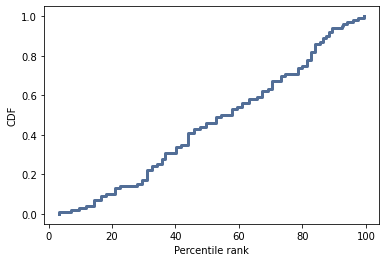

In [19]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf.  Here's an example.

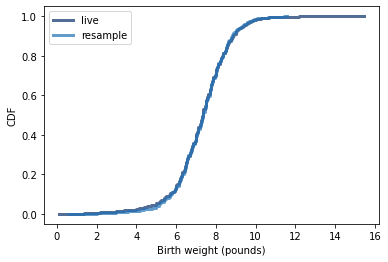

In [20]:
resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

This confirms that the random sample has the same distribution as the original data.

## 4.2 Exercises

The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [30]:
t = np.random.random(1000)
print(t)
t.head()

[2.03727346e-01 8.80548611e-01 9.30464705e-01 3.23122438e-01
 7.75477259e-01 5.08053596e-01 2.11396235e-01 6.90718873e-01
 1.83542538e-02 1.42346493e-01 4.72321628e-01 4.78086560e-01
 4.26653315e-01 3.35908147e-02 4.39918160e-01 4.28571289e-01
 9.82814407e-01 2.46616232e-01 8.18596423e-01 6.26885056e-01
 8.13155876e-01 8.45214690e-01 1.05926079e-01 1.91749531e-01
 8.08404264e-01 2.25151201e-01 2.77637074e-01 5.70009885e-01
 6.90307113e-01 3.93637657e-01 1.81137437e-02 5.49186050e-01
 4.66219219e-01 9.02766373e-01 2.96184106e-01 8.08441417e-01
 2.81433620e-01 6.04487429e-01 7.08112700e-01 7.40215854e-01
 9.60899140e-01 4.63832734e-01 4.54287407e-01 9.50410145e-01
 1.01208527e-02 1.07169449e-01 8.69134607e-01 5.19512341e-02
 5.72474139e-01 2.01512693e-01 5.44242705e-01 9.89385656e-01
 5.78541937e-01 9.02399996e-01 3.59147336e-01 8.47521216e-01
 9.85070194e-01 3.20259213e-01 5.41955164e-01 6.96659090e-01
 3.25163336e-01 8.03393685e-01 9.27786563e-01 7.35702947e-01
 8.16134193e-01 5.644401

AttributeError: 'numpy.ndarray' object has no attribute 'head'

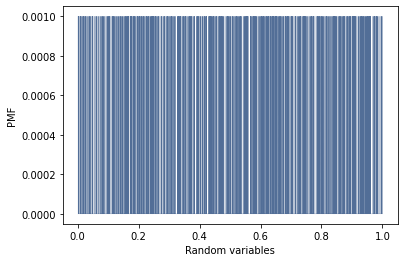

In [28]:
pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.2)
thinkplot.Config(xlabel = 'Random variables', ylabel = 'PMF')

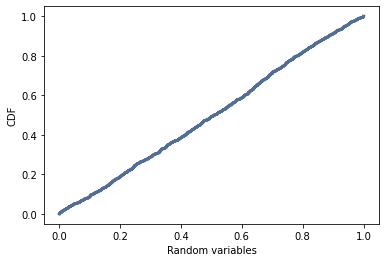

In [27]:
cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel = 'Random variables', ylabel = 'CDF')